## Digit Recognision

project detail

In [248]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pyplot
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np


    
# from keras.datasets import mnist
# (X_train, y_train), (X_test, y_test) = mnist.load_data()


In [237]:
# mnist = pd.read_csv("train.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [238]:
print("train missing values:", train.isnull().any().sum())
print("test missing values:", test.isnull().any().sum())

train missing values: 0
test missing values: 0


In [239]:
X = train.iloc[:,1:].reset_index(drop= True)
Y = train.iloc[:,0].reset_index(drop = True)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)

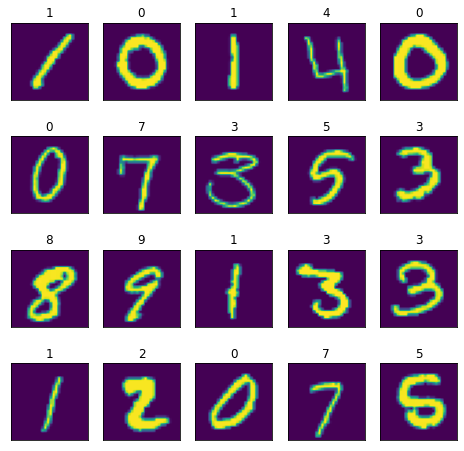

In [240]:
#Visualising first 20 images in train data
class_names = [0,1,2,3,4,5,6,7,8,9]

plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X.loc[i].values.reshape((28,28)))
    label_index = int(Y[i])
    plt.title(class_names[label_index])
plt.show()

In [246]:
'''
The pixel values are between 0 and 255. 
It is almost always a good idea to perform some scaling of input values when using neural network models. 
Because the scale is well known and well behaved, we can very quickly normalize the pixel values to the range 0 
and 1 by dividing each value by the maximum of 255.
normalize inputs from 0-255 to 0-1
'''
x_train = x_train / 255
x_test = x_test / 255
test = test/255
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
22460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [242]:
'''
the output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.
We can easily do this using the built-in np_utils.to_categorical() helper function in Keras.
'''
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [243]:
'''
We are now ready to create our simple neural network model. 
We will define our model in a function. 
This is handy if you want to extend the example later and try and get a better score.

The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784). 
A rectifier activation function is used for the neurons in the hidden layer. This is required to control the values that
come after first level of transformation (they can turn out to be negative).

A softmax activation function is used on the output layer to turn the outputs into probability-like values 
and allow one class of the 10 to be selected as the model’s output prediction. 
Logarithmic loss is used as the loss function (called categorical_crossentropy in Keras) 
and the efficient ADAM gradient descent algorithm is used to learn the weights.

We can now fit and evaluate the model. The model is fit over 10 epochs with updates every 200 images. 
The test data is used as the validation dataset, allowing you to see the skill of the model as it trains. 
A verbose value of 2 is used to reduce the output to one line for each training epoch.
'''
# define baseline model

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



In [244]:
'''
test dataset is used to evaluate the model and a classification error rate is printed.
'''
num_pixels = x_train.shape[1]
# build the model
model = baseline_model()
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
189/189 - 2s - loss: 0.3415 - accuracy: 0.9037 - val_loss: 0.1914 - val_accuracy: 0.9464
Epoch 2/10
189/189 - 1s - loss: 0.1397 - accuracy: 0.9595 - val_loss: 0.1371 - val_accuracy: 0.9581
Epoch 3/10
189/189 - 1s - loss: 0.0907 - accuracy: 0.9740 - val_loss: 0.1095 - val_accuracy: 0.9664
Epoch 4/10
189/189 - 1s - loss: 0.0651 - accuracy: 0.9813 - val_loss: 0.0999 - val_accuracy: 0.9686
Epoch 5/10
189/189 - 1s - loss: 0.0468 - accuracy: 0.9873 - val_loss: 0.0872 - val_accuracy: 0.9731
Epoch 6/10
189/189 - 1s - loss: 0.0357 - accuracy: 0.9907 - val_loss: 0.0895 - val_accuracy: 0.9733
Epoch 7/10
189/189 - 1s - loss: 0.0266 - accuracy: 0.9933 - val_loss: 0.0793 - val_accuracy: 0.9764
Epoch 8/10
189/189 - 1s - loss: 0.0193 - accuracy: 0.9958 - val_loss: 0.0725 - val_accuracy: 0.9774
Epoch 9/10
189/189 - 1s - loss: 0.0147 - accuracy: 0.9972 - val_loss: 0.0723 - val_accuracy: 0.9779
Epoch 10/10
189/189 - 1s - loss: 0.0107 - accuracy: 0.9982 - val_loss: 0.0698 - val_accuracy: 0.9807

In [254]:
predictions = model.predict(test)
predictions.shape
new_predictions = np.argmax(predictions, axis=1)
new_predictions = pd.Series(new_predictions)

print(new_predictions.shape)

index_col = pd.Series(np.arange(1, len(new_predictions)+1))
index_col.head()
index_col.shape
# prepare a submission file
submission = pd.DataFrame({'ImageId':index_col, 'Label':new_predictions})
submission.info()
submission.head()

submission.to_csv('submission.csv')

(28000,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


In [257]:
submission.head(20)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


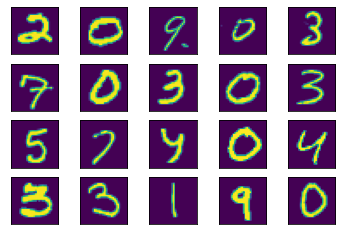

In [256]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test.loc[i].values.reshape((28,28)))
#     label_index = int(Y[i])
#     plt.title(class_names[label_index])
plt.show()